### 라이브러리 로딩

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import math
from sklearn import preprocessing 

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#서포트 벡터 머신
from sklearn.svm import SVR

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/BOSTON_HOUSING.csv", engine = "python", encoding="CP949")
df_raw.shape

(506, 14)

In [3]:
x_var = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
y_var = ["MEDV"]

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [6]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


# 변수 너무 쪼개지는 것들은 그루핑

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55519c64a8>,
      dtype=object)

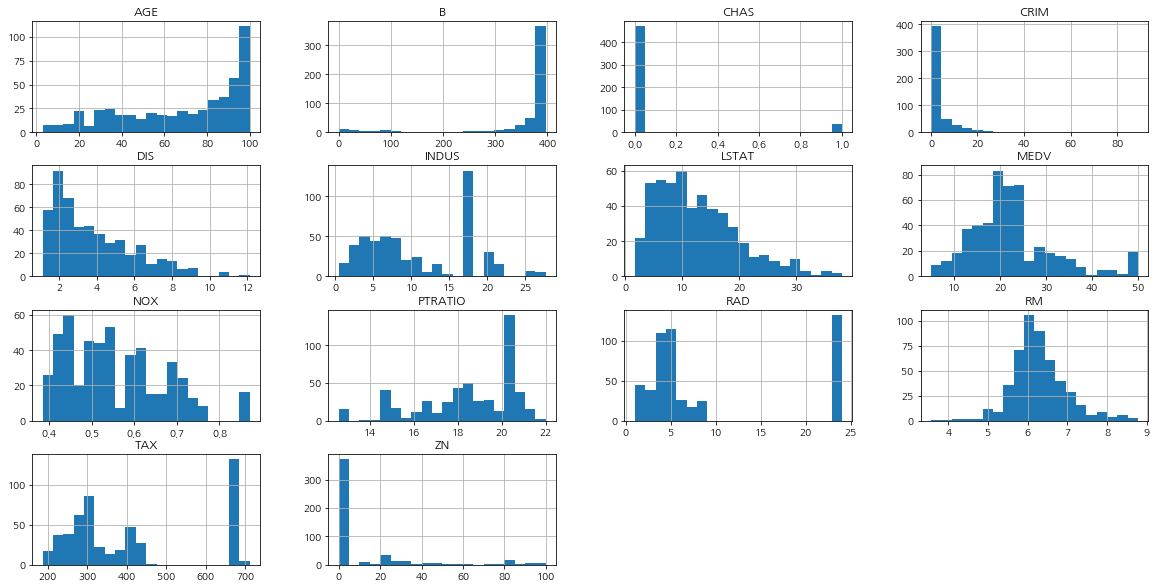

In [7]:
df_raw.hist(figsize=(20,10), bins=20)

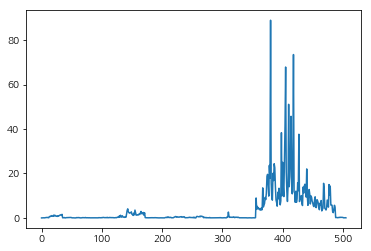

In [19]:
plt.plot(df_raw['CRIM'])

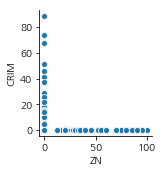

In [63]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='ZN')

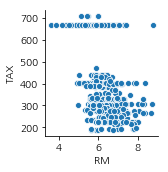

In [67]:
sns.pairplot(df_raw, y_vars='TAX', x_vars='RM')

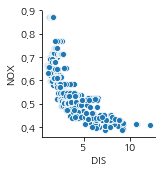

In [62]:
sns.pairplot(df_raw, y_vars='NOX', x_vars='DIS')

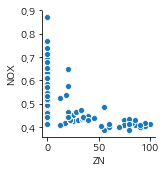

In [60]:
sns.pairplot(df_raw, y_vars='NOX', x_vars='ZN')

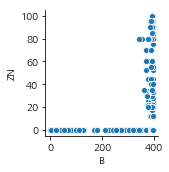

In [46]:
sns.pairplot(df_raw, y_vars='ZN', x_vars='B')

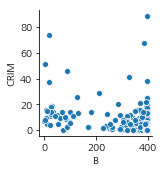

In [47]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='B')

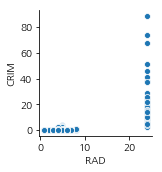

In [38]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='RAD')

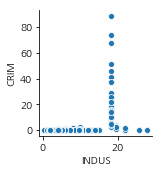

In [49]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='INDUS')

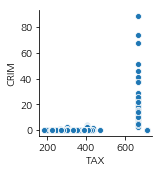

In [50]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='TAX')

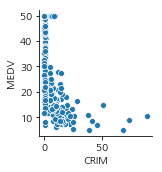

In [44]:
sns.pairplot(df_raw, y_vars='MEDV', x_vars='CRIM')

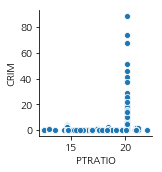

In [78]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='PTRATIO')

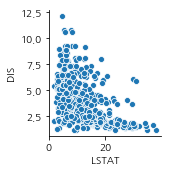

In [79]:
sns.pairplot(df_raw, y_vars='DIS', x_vars='LSTAT')

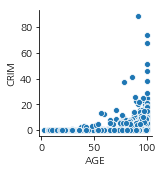

In [80]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='AGE')

In [27]:
df_raw['B2'] = df_raw['B2']**2

# 스케일링 (B, CRIM)

In [10]:
df_BB = scale(df_raw['B'])
df_raw['B_TR'] = pd.DataFrame(df_BB)
df_raw['B_TR']

0      0.441052
1      0.441052
2      0.396427
3      0.416163
4      0.441052
5      0.410571
6      0.426798
7      0.441052
8      0.328448
9      0.329325
10     0.393028
11     0.441052
12     0.370880
13     0.441052
14     0.255973
15     0.427018
16     0.330860
17     0.329764
18    -0.742112
19     0.375814
20     0.218147
21     0.393138
22     0.441052
23     0.415176
24     0.412873
25    -0.583896
26     0.221546
27    -0.551442
28     0.342811
29     0.258276
         ...   
476    0.433486
477   -0.078878
478    0.252465
479    0.292156
480    0.441052
481    0.399059
482    0.423290
483    0.397414
484    0.154115
485    0.350267
486    0.394782
487    0.345881
488    0.421206
489   -0.138415
490   -0.419321
491    0.366604
492    0.441052
493    0.441052
494    0.441052
495    0.401471
496    0.441052
497    0.441052
498    0.441052
499    0.428662
500    0.441052
501    0.387217
502    0.441052
503    0.441052
504    0.403225
505    0.441052
Name: B_TR, Length: 506,

In [11]:
df_CR = scale(df_raw['CRIM'])
df_raw['CRIM_TR'] = pd.DataFrame(df_CR)
df_raw['CRIM_TR']

0     -0.419782
1     -0.417339
2     -0.417342
3     -0.416750
4     -0.412482
5     -0.417044
6     -0.410243
7     -0.403696
8     -0.395935
9     -0.400729
10    -0.394346
11    -0.406847
12    -0.409604
13    -0.347230
14    -0.346276
15    -0.347506
16    -0.297868
17    -0.329258
18    -0.327103
19    -0.336054
20    -0.274843
21    -0.321363
22    -0.277091
23    -0.305491
24    -0.333207
25    -0.322701
26    -0.342325
27    -0.309291
28    -0.330562
29    -0.303859
         ...   
476    0.146384
477    1.327804
478    0.770330
479    1.247542
480    0.257241
481    0.243762
482    0.246436
483   -0.092533
484   -0.143716
485    0.006999
486    0.241850
487    0.142225
488   -0.402961
489   -0.399178
490   -0.396375
491   -0.408212
492   -0.407563
493   -0.400349
494   -0.387983
495   -0.399688
496   -0.386816
497   -0.389285
498   -0.392690
499   -0.399823
500   -0.394406
501   -0.413229
502   -0.415249
503   -0.413447
504   -0.407764
505   -0.415000
Name: CRIM_TR, Length: 5

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([-0.41978194,  0.61558927,  1.65096049,  2.6863317 ,  3.72170291,
         4.75707413,  5.79244534,  6.82781655,  7.86318776,  8.89855898,
         9.93393019]),
 <a list of 10 Patch objects>)

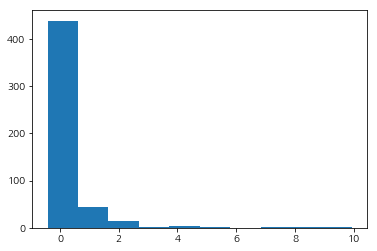

In [12]:
plt.hist(df_raw['CRIM_TR'])

# B 그루핑

In [13]:
bins = [-1, 300, 100000]
labels = ["0", "1"]
df_raw['B_GR'] = pd.cut(df_raw['B'], bins, labels=labels)
df_raw['B_GR']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
501    1
502    1
503    1
504    1
505    1
Name: B_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

In [14]:
count = df_raw['B_GR'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'COUNT':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Data'
count_data

Data,COUNT,CumCnt,Percent,CumPct
0,54,54,10.671937,10.671937
1,452,506,89.328063,100.000000


# 주거지 비율 처리 (0 : 상업지구, 1 : 주거지구)

In [15]:
bins = [-1, 12.0, 1000.0]
labels = ["0", "1"]
df_raw['ZN_GR'] = pd.cut(df_raw['ZN'], bins, labels=labels)
df_raw['ZN_GR']

0      1
1      0
2      0
3      0
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: ZN_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# PTRATIO 비율 처리 (0 : 거주지, 1 : 공장지대)

In [75]:
bins = [-1, 19, 100000]
labels = ["0", "1"]
df_raw['PTRATIO_GR'] = pd.cut(df_raw['PTRATIO'], bins, labels=labels)
df_raw['PTRATIO_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
501    1
502    1
503    1
504    1
505    1
Name: PTRATIO_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# INDUS 그루핑 (0: 소매업, 1: 비소매업)

In [16]:
bins = [-1, 16, 100000]
labels = ["0", "1"]
df_raw['INDUS_GR'] = pd.cut(df_raw['INDUS'], bins, labels=labels)
df_raw['INDUS_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: INDUS_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# RAD 그루핑 (0: 불편지역, 1: 편의지역)

In [17]:
bins = [-1, 15, 1000]
labels = ["0", "1"]
df_raw['RAD_GR'] = pd.cut(df_raw['RAD'], bins, labels=labels)
df_raw['RAD_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: RAD_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# TAX 그루핑 (0: 재산세 적게 내는 지역, 1: 재산세 높은 지역)

In [18]:
bins = [-1, 500, 1000]
labels = ["0", "1"]
df_raw['TAX_GR'] = pd.cut(df_raw['TAX'], bins, labels=labels)
df_raw['TAX_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: TAX_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

In [76]:
count = df_raw['PTRATIO_GR'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'COUNT':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Data'
count_data

Data,COUNT,CumCnt,Percent,CumPct
0,253,253,50.0,50.0
1,253,506,50.0,100.0


# AGE 변수 그루핑 방법 (0:신생, 1:중간, 2:구식)

In [214]:
df_raw['AGE_GR'] = pd.qcut(df_raw['AGE'], 3, labels=["0", "1", "2"])
df_raw['AGE_GR']

0      1
1      1
2      1
3      0
4      0
5      1
6      1
7      2
8      2
9      1
10     2
11     1
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     2
21     1
22     2
23     2
24     2
25     1
26     2
27     1
28     2
29     1
      ..
476    2
477    2
478    2
479    1
480    1
481    1
482    1
483    0
484    0
485    0
486    1
487    0
488    2
489    2
490    2
491    2
492    1
493    0
494    0
495    0
496    1
497    1
498    1
499    1
500    1
501    1
502    1
503    2
504    1
505    1
Name: AGE_GR, Length: 506, dtype: category
Categories (3, object): [0 < 1 < 2]

In [211]:
df_raw.isnull().sum()

MEDV         0
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
AGE_GR       0
AGE_GROUP    0
BK           0
B_GR         0
INDUS_GR     0
B_TR         0
CRIM_TR      0
ZN_GR        0
RAD_GR       0
TAX_GR       0
dtype: int64

In [83]:
f_result = stats.f_oneway(df_raw['AGE_GR'][df_raw['AGE_GR'] == '1']
                          ,df_raw['AGE_GR'][df_raw['AGE_GR'] == '2']
                          ,df_raw['AGE_GR'][df_raw['AGE_GR'] == '3'])

f,p=f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F검정통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F검정통계량:1.491025780345227e+18
p-value:0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d9cae2b0>,
      dtype=object)

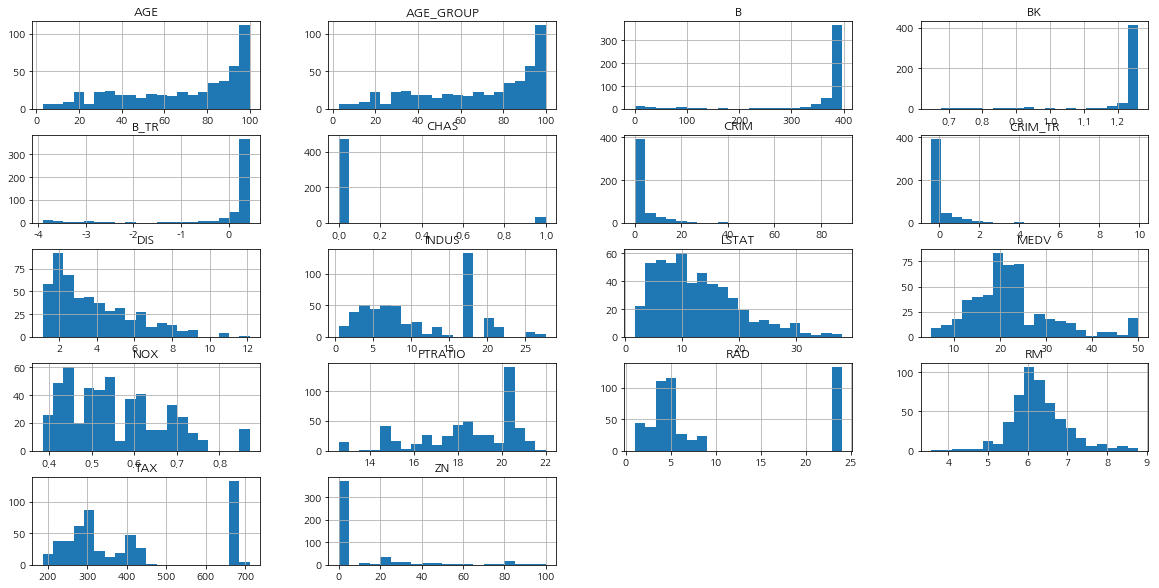

In [212]:
df_raw.hist(figsize=(20,10), bins=20)

# 전처리 완료 및 데이터 가공 시작

In [96]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw[["CRIM","ZN_GR","INDUS_GR","CHAS","NOX","RM","DIS","AGE","RAD_GR","TAX_GR","PTRATIO_GR","LSTAT"]]

In [97]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=42)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 12)
train data Y size : (354,)
test data X size : (152, 12)
test data Y size : (152,)


# 다중 회귀분석 실시

In [98]:
reg_model = smf.ols(formula = "MEDV ~ CRIM+ZN_GR+CHAS+NOX+RM+DIS+PTRATIO_GR+LSTAT", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     148.1
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          2.63e-126
Time:                        21:35:59   Log-Likelihood:                -1531.9
No. Observations:                 506   AIC:                             3082.
Df Residuals:                     497   BIC:                             3120.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.6980      3.833     

## 다중공선성 확인

# Decision Tree 분석 실시

In [99]:
tree_final = DecisionTreeRegressor()
tree_final.fit(df_train_x, df_train_y)

print(tree_final.score(df_train_x,df_train_y))
print(tree_final.score(df_test_x,df_test_y))

1.0
0.8358554076929576


# RANDOM FOREST 분석 실시

In [100]:
rf_final = RandomForestRegressor()
rf_final.fit(df_train_x, df_train_y)

print(rf_final.score(df_train_x,df_train_y))
print(rf_final.score(df_test_x,df_test_y))

0.9712359393824193
0.8658663014265656


# GRADIENT BOOSITNG 분석 실시

In [102]:
gb_final = GradientBoostingRegressor()
gb_final.fit(df_train_x, df_train_y)

print(gb_final.score(df_train_x,df_train_y))
print(gb_final.score(df_test_x,df_test_y))

0.9752404505133612
0.879635315707058


In [111]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range (1,21)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(random_state = 1234
                                   ,n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,n_estimators,TrainScore,TestScore,D
0,10,0.771,0.699,0.072
1,20,0.904,0.827,0.078
2,30,0.935,0.854,0.081
3,40,0.949,0.861,0.088
4,50,0.957,0.867,0.090
5,60,0.962,0.869,0.093
6,70,0.966,0.870,0.096
7,80,0.970,0.872,0.097
8,90,0.973,0.874,0.099
9,100,0.975,0.874,0.102


In [112]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range (1,101)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 200,
                                   min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_leaf
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore,D
0,1,0.990,0.877,0.113
1,2,0.989,0.892,0.097
2,3,0.988,0.885,0.103
3,4,0.987,0.868,0.119
4,5,0.986,0.864,0.122
5,6,0.983,0.852,0.132
6,7,0.982,0.851,0.131
7,8,0.979,0.854,0.125
8,9,0.977,0.858,0.119
9,10,0.977,0.850,0.127


In [114]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2, 51)]

for v_min_samples_split in para_split :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 200, min_samples_leaf=2,
                                    min_samples_split = v_min_samples_split)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


df_score_split["D"] = df_score_split["TrainScore"]-df_score_split["TestScore"]

df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore,D
0,4,0.989,0.892,0.097
1,6,0.989,0.887,0.102
2,8,0.988,0.886,0.102
3,10,0.987,0.887,0.100
4,12,0.987,0.882,0.104
5,14,0.986,0.883,0.103
6,16,0.986,0.884,0.102
7,18,0.985,0.883,0.103
8,20,0.985,0.885,0.101
9,22,0.985,0.886,0.098


In [115]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 21)]

for v_max_depth in para_depth :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 90, min_samples_leaf=2, min_samples_split =4,
                                    max_depth = v_max_depth)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score


df_score_depth["D"] = df_score_depth["TrainScore"]-df_score_depth["TestScore"]

df_score_depth.round(3)

,Depth,TrainScore,TestScore,D
0,1,0.864,0.807,0.057
1,2,0.938,0.851,0.087
2,3,0.971,0.882,0.089
3,4,0.988,0.866,0.122
4,5,0.995,0.885,0.110
5,6,0.999,0.891,0.108
6,7,1.000,0.887,0.113
7,8,1.000,0.873,0.127
8,9,1.000,0.871,0.129
9,10,1.000,0.866,0.134


In [118]:
train_score = []; test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingRegressor(n_estimators = 90, min_samples_leaf=2, min_samples_split =4,
                                   max_depth =6, learning_rate = v_learning_rate)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Rate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score


df_score_lr["D"] = df_score_lr["TrainScore"]-df_score_lr["TestScore"]

df_score_lr.round(3)

,Learning Rate,TrainScore,TestScore,D
0,0.1,0.999,0.884,0.115
1,0.2,1.000,0.892,0.108
2,0.3,1.000,0.885,0.115
3,0.4,1.000,0.835,0.165
4,0.5,1.000,0.864,0.136
5,0.6,1.000,0.850,0.150
6,0.7,1.000,0.893,0.107
7,0.8,1.000,0.796,0.204
8,0.9,1.000,0.850,0.150


In [ ]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 90, min_samples_leaf=9, min_samples_split =96,
                                   max_depth =8, learning_rate =0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("score on test set: {:.3f}".format(gb_final.score(df_val_x,df_val_y)))
print("score on Final: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5548e221d0>]],
      dtype=object)

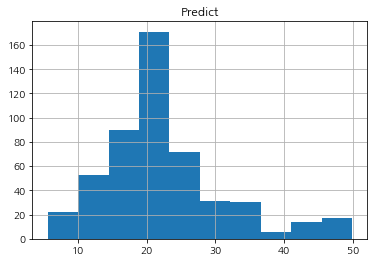

In [108]:
y_predict=gb_final.predict(df_raw_x)
y_pre = pd.DataFrame()
y_pre['Predict'] = y_predict

y_pre.hist()

# SUPPORT VECTOR MACHINE 분석 실시

In [246]:
svm_final = SVR()
svm_final.fit(df_train_x, df_test_y)

print("Score on training set: {:.3f}".format(svm_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(svm_final.score(df_test_x,df_test_y)))

ValueError: Found input variables with inconsistent numbers of samples: [354, 152]